In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot  as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:
df = pd.read_csv("linear_line-datas.csv")

In [3]:
df.head()

,x,y
0,4.753198,18.144798
1,7.482920,20.002888
2,1.001029,4.084733
3,3.720993,16.327152
4,2.320803,9.982894


In [4]:
df = df.rename(columns={"x":"height", "y": "weight"})

In [5]:
df.head()

,height,weight
0,4.753198,18.144798
1,7.482920,20.002888
2,1.001029,4.084733
3,3.720993,16.327152
4,2.320803,9.982894


In [6]:
df.describe()

,height,weight
count,100.000000,100.000000
mean,5.372901,19.463537
std,2.662962,8.798315
min,1.001029,-0.007462
25%,2.888507,11.759102
50%,5.236684,19.541428
75%,7.495686,26.635032
max,9.899750,35.239938


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   height  100 non-null    float64
 1   weight  100 non-null    float64
dtypes: float64(2)
memory usage: 1.7 KB


In [8]:
df.shape

(100, 2)

In [9]:
df.isna().sum()

height    0
weight    0
dtype: int64

In [10]:
df.duplicated().sum()

np.int64(0)

Text(0, 0.5, '<----value of weight---->')

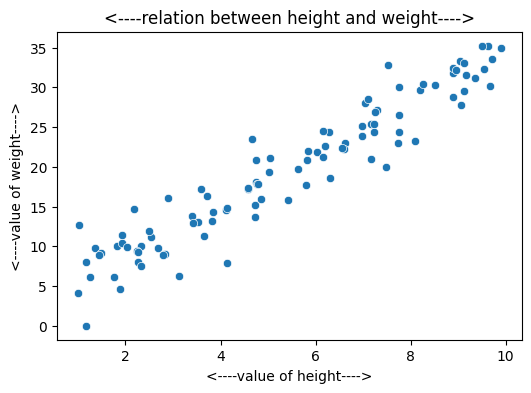

In [14]:
plt.figure(figsize=(6,4))
sns.scatterplot(x="height",y="weight", data=df)
plt.title("<----relation between height and weight---->")
plt.xlabel("<----value of height---->")
plt.ylabel("<----value of weight---->")


In [15]:
df.corr()

,height,weight
height,1.000000,0.951881
weight,0.951881,1.000000


<Axes: >

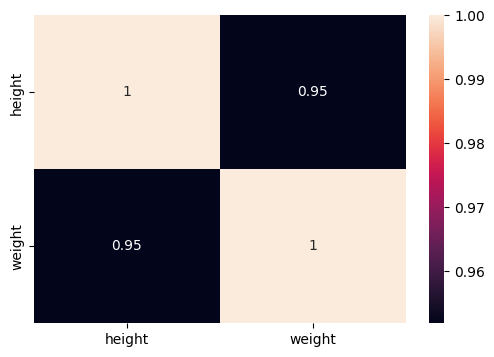

In [16]:
plt.figure(figsize=(6,4))
sns.heatmap(df.corr(),annot=True)